<a href="https://colab.research.google.com/github/amir-ab/ML_PCA_Cars_Dataset/blob/main/ML_PCA_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = ("/content/autos_acp.csv")
df = pd.read_csv(dataset, sep=";")
df.head()

,Modele,CYL,PUISS,LONG,LARG,POIDS,V-MAX,FINITION,PRIX,R-POID.PUIS
0,Alfasud TI,1350,79,393,161,870,165,B,30570,"11,01"
1,Audi 100,1588,85,468,177,1110,160,TB,39990,"13,06"
2,Simca 1300,1294,68,424,168,1050,152,M,29600,"15,44"
3,Citroen GS Club,1222,59,412,161,930,151,M,28250,"15,76"
4,Fiat 132,1585,98,439,164,1105,165,B,34900,"11,28"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Modele       18 non-null     object
 1   CYL          18 non-null     int64 
 2   PUISS        18 non-null     int64 
 3   LONG         18 non-null     int64 
 4   LARG         18 non-null     int64 
 5   POIDS        18 non-null     int64 
 6   V-MAX        18 non-null     int64 
 7   FINITION     18 non-null     object
 8   PRIX         18 non-null     int64 
 9   R-POID.PUIS  18 non-null     object
dtypes: int64(7), object(3)
memory usage: 1.5+ KB


In [4]:
df.describe()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1631.666667,84.611111,433.500000,166.666667,1078.833333,158.277778,34158.611111
std,373.929846,20.376281,22.107358,5.313689,136.957808,12.140383,6571.577795
min,1166.000000,55.000000,393.000000,157.000000,815.000000,140.000000,22100.000000
25%,1310.250000,70.750000,424.000000,162.250000,1020.000000,151.250000,29842.500000
50%,1577.500000,82.000000,434.500000,167.000000,1087.500000,160.000000,33345.000000
75%,1797.500000,98.000000,448.000000,169.750000,1126.750000,165.000000,38457.500000
max,2664.000000,128.000000,469.000000,177.000000,1370.000000,180.000000,47700.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d6a220a10>,
      dtype=object)

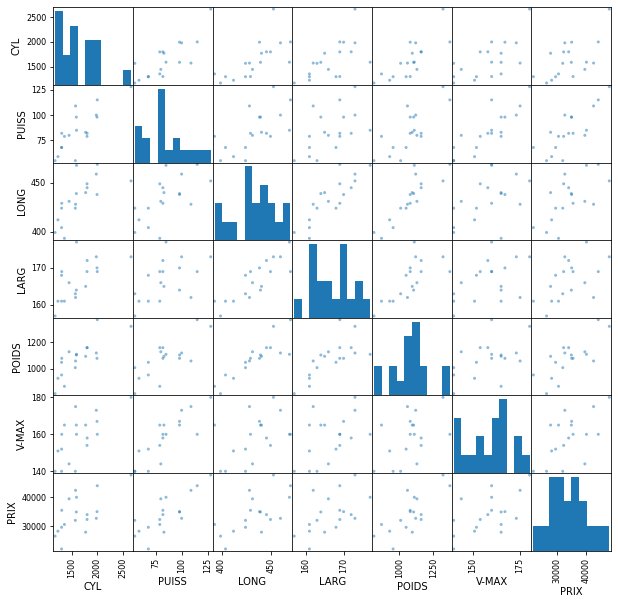

In [5]:
pd.plotting.scatter_matrix(df,figsize=(10,10))

In [6]:
df.shape

(18, 10)

In [7]:
data = df.drop(['Modele','FINITION','R-POID.PUIS'],1,errors='ignore')
#data['R-POID.PUIS'] = data['R-POID.PUIS'].astype(float)
#data['R-POID.PUIS'] = pd.to_numeric(data['R-POID.PUIS'],errors='coerce')
data.head()


,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX
0,1350,79,393,161,870,165,30570
1,1588,85,468,177,1110,160,39990
2,1294,68,424,168,1050,152,29600
3,1222,59,412,161,930,151,28250
4,1585,98,439,164,1105,165,34900


In [8]:
# accelerating the process
import numpy as np 
Xnum = data.values
Xnum

array([[ 1350,    79,   393,   161,   870,   165, 30570],
       [ 1588,    85,   468,   177,  1110,   160, 39990],
       [ 1294,    68,   424,   168,  1050,   152, 29600],
       [ 1222,    59,   412,   161,   930,   151, 28250],
       [ 1585,    98,   439,   164,  1105,   165, 34900],
       [ 1297,    82,   429,   169,  1080,   160, 35480],
       [ 1796,    79,   449,   169,  1160,   154, 32300],
       [ 1565,    55,   424,   163,  1010,   140, 32000],
       [ 2664,   128,   452,   173,  1320,   180, 47700],
       [ 1166,    55,   399,   157,   815,   140, 26540],
       [ 1570,   109,   428,   162,  1060,   175, 42395],
       [ 1798,    82,   445,   172,  1160,   158, 33990],
       [ 1998,   115,   469,   169,  1370,   160, 43980],
       [ 1993,    98,   438,   170,  1080,   167, 35010],
       [ 1442,    80,   431,   166,  1129,   144, 39450],
       [ 1769,    83,   440,   165,  1095,   165, 27900],
       [ 1979,   100,   459,   173,  1120,   173, 32700],
       [ 1294,

In [9]:
# Immuatable structre (you can't change not dynamic list)
type(Xnum)

numpy.ndarray

### Step 1: Standarize The d- dimensional dataset
- Subtract the mean value ( la valeur moyenne )
- Divide by the standard deviation ( l'écart-type)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
Xss = ss.fit_transform(Xnum)

### Step 2: Construct the Covariance Matrix

In [13]:
matrice_covariance = np.cov(Xss.T)

### Step 3: Decompose covariance eigenvectors and eigenvalues

In [14]:
from numpy.linalg import eig

(7, 7)

In [15]:
matrice_covariance.shape

(7, 7)

In [18]:
(valeurs_propres , vecteurs_propres)= eig(matrice_covariance)

### Step 4: Sort the eigenvalues by order to rank the corresponding eigenvectors

In [21]:
pourcentage_information = ( valeurs_propres / valeurs_propres.sum() ) * 100

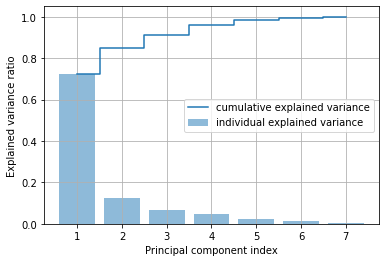

In [30]:
tot  = sum(valeurs_propres)
var_exp = [(i / tot) for i in sorted (valeurs_propres, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,8), var_exp , alpha=0.5, align='center', label='individual explained variance') 
plt.step(range(1,8), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.show()

###  Step 5: Select K eigenvectors wich correspond to largest K eigenvalues, where K is the dimensionality of the new fetaure subspace (k <= d)

In [42]:
from sklearn.decomposition import PCA
# here you have choice : spcify the number of components or percentage
pca = PCA(0.9)
#pca = PCA(n_components=2)

### Step 6 : Construct a projection matrix "W" from the top k eigenvectors

In [46]:
Xpca = pca.fit_transform(Xss)

### Step 7 : Transform the d-dimensional input dataset X unsing the projection matrix W to obtain the new K-dimensional feature subspace.

In [51]:
print("original shape:   ", Xnum.shape)
print("transformed shape:", Xpca.shape)

original shape:    (18, 7)
transformed shape: (18, 3)


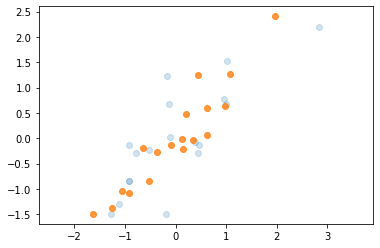

In [52]:
X_new = pca.inverse_transform(Xpca)
plt.scatter(Xss[:,0], Xss[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');